# Etapa 1: Recopilación y Preparación de Datos (Clases 1 a 4)

### Objetivo: Demostrar habilidades en Python, familiaridad con el entorno de trabajo y conocimientos básicos sobre manipulación de datos.

## Actividades:

### 1- Crear un documento en Google Colaboratory y cargar los sets de datos como DataFrames

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [95]:
import os
os.listdir('/content/drive/MyDrive/2025_Talento_Tech_CodoACodo_BA/2025_Data_Analitic_Python/16_Entrega_Final/Piazza Guillermo Jorge - Comisión 25262 - TPI Data Analytics FINAL')

['TPI Data Analytics FINAL.ipynb',
 'ventas.csv',
 'marketing.csv',
 'ventas.gsheet',
 'clientes.csv',
 'Piazza Guillermo Jorge - Comisión 25262 - TPI Data Analytics FINAL.ipynb',
 'resultados_preentrega']

In [96]:
import pandas as pd
from pathlib import Path

# Definir ruta base
ruta_base = '/content/drive/MyDrive/2025_Talento_Tech_CodoACodo_BA/2025_Data_Analitic_Python/16_Entrega_Final/Piazza Guillermo Jorge - Comisión 25262 - TPI Data Analytics FINAL'

# Cargar los datasets
df_clientes = pd.read_csv(ruta_base + '/clientes.csv', dtype=str)
df_marketing = pd.read_csv(ruta_base + '/marketing.csv', dtype=str)
df_ventas = pd.read_csv(ruta_base + '/ventas.csv', dtype=str)

# Validamos formas para comprobar que se cargaron correctamente.
print("df_ventas.shape ->", df_ventas.shape)
print("df_clientes.shape ->", df_clientes.shape)
print("df_marketing.shape ->", df_marketing.shape)

# Mostramos las primeras filas de cada dataset para corroborar estructura de columnas.
display(df_ventas.head(3))
display(df_clientes.head(3))
display(df_marketing.head(3))

df_ventas.shape -> (3035, 6)
df_clientes.shape -> (567, 5)
df_marketing.shape -> (90, 6)


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5,02/01/2024,Decoración
2,1156,Secadora,$97.96,3,02/01/2024,Electrodomésticos


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.4,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024


**Resultado de la etapa 1:** Se cargaron correctamente los tres datasets (ventas, clientes y marketing) y se validaron dimensiones y columnas.


### 2- Realizar un script básico que calcule las ventas mensuales utilizando variables y operadores.


In [97]:
v = df_ventas.copy()
v['precio'] = (v['precio'].astype(str)
               .str.replace(r'[^0-9,.\-]', '', regex=True)
               .str.replace(',', '.', regex=False)
               .replace('', pd.NA))

v['precio'] = pd.to_numeric(v['precio'], errors='coerce') # Convert to numeric, coercing errors to NaN
v['cantidad'] = pd.to_numeric(v['cantidad'], errors='coerce')
v['fecha_venta'] = pd.to_datetime(v['fecha_venta'], dayfirst=True, errors='coerce')
v['mes'] = v['fecha_venta'].dt.to_period('M').astype(str)

ventas_mensuales = {}
for p, q, m in zip(v['precio'], v['cantidad'], v['mes']):
    if pd.isna(p) or pd.isna(q) or m is None:
        continue
    ventas_mensuales[m] = ventas_mensuales.get(m, 0.0) + (p * q)

dict(sorted(ventas_mensuales.items()))

{'2024-01': 129604.99000000003,
 '2024-02': 118672.44000000002,
 '2024-03': 136779.15,
 '2024-04': 144380.10000000003,
 '2024-05': 143727.25000000006,
 '2024-06': 108480.17000000003,
 '2024-07': 116229.97000000004,
 '2024-08': 119680.15000000001,
 '2024-09': 115787.85000000002,
 '2024-10': 112117.13,
 '2024-11': 119951.79000000005,
 '2024-12': 117631.93999999994}

In [98]:
# Validación rápida con Pandas
val = v.dropna(subset=['precio','cantidad','mes']).copy()
val['importe'] = val['precio'] * val['cantidad']
val.groupby('mes', as_index=False)['importe'].sum().sort_values('mes')


,mes,importe
0,2024-01,129604.99
1,2024-02,118672.44
2,2024-03,136779.15
3,2024-04,144380.10
4,2024-05,143727.25
5,2024-06,108480.17
6,2024-07,116229.97
7,2024-08,119680.15
8,2024-09,115787.85
9,2024-10,112117.13


### 3- Estructuras de Datos: Desarrollar un programa que almacene los datos de ventas (producto, precio, cantidad). Decidir si conviene utilizar diccionarios o listas.

In [99]:
dfv = v.dropna(subset=['producto','precio','cantidad']).copy()
ventas_registros = dfv[['producto','precio','cantidad']].to_dict('records')

# Total general
total_general = round(sum(r['precio'] * r['cantidad'] for r in ventas_registros), 2)

# Totales por producto (diccionario)
totales_por_producto = {}
for r in ventas_registros:
    m = r['precio'] * r['cantidad']
    totales_por_producto[r['producto']] = totales_por_producto.get(r['producto'], 0.0) + m

total_general


1483042.93

In [7]:
# Tabla ordenada de totales por producto
totales_producto_df = (
    pd.Series(totales_por_producto, name='ventas_totales')
      .sort_values(ascending=False)
      .reset_index()
      .rename(columns={'index':'producto'})
)
totales_producto_df.head(10)


,producto,ventas_totales
0,Lámpara de mesa,84699.15
1,Auriculares,76468.44
2,Microondas,72562.89
3,Cafetera,59669.54
4,Smartphone,55615.64
5,Cuadro decorativo,54297.60
6,Secadora,53214.24
7,Jarrón decorativo,51401.51
8,Aspiradora,51042.82
9,Rincón de plantas,50997.55


In [100]:
totales_producto_df = (
    pd.Series(totales_por_producto, name='ventas_totales')
      .sort_values(ascending=False)
      .reset_index()
      .rename(columns={'index': 'producto'})
)

totales_producto_df.head(10)


,producto,ventas_totales
0,Lámpara de mesa,84699.15
1,Auriculares,76468.44
2,Microondas,72562.89
3,Cafetera,59669.54
4,Smartphone,55615.64
5,Cuadro decorativo,54297.60
6,Secadora,53214.24
7,Jarrón decorativo,51401.51
8,Aspiradora,51042.82
9,Rincón de plantas,50997.55


In [101]:
# Tabla ordenada de totales por producto
totales_producto_df = (
    pd.Series(totales_por_producto, name='ventas_totales')
      .sort_values(ascending=False)
      .reset_index()
      .rename(columns={'index':'producto'})
)
totales_producto_df.head(10)


,producto,ventas_totales
0,Lámpara de mesa,84699.15
1,Auriculares,76468.44
2,Microondas,72562.89
3,Cafetera,59669.54
4,Smartphone,55615.64
5,Cuadro decorativo,54297.60
6,Secadora,53214.24
7,Jarrón decorativo,51401.51
8,Aspiradora,51042.82
9,Rincón de plantas,50997.55


### 4- Introducción a Pandas: realizar un análisis exploratorio inicial de los DataFrames.

In [102]:
def eda_inicial(df, nombre):
    print(f'== {nombre} ==')
    print('shape:', df.shape)
    display(df.head(3))
    print('\ninfo():'); df.info()
    print('\nNulos por columna:\n', df.isnull().sum())
    print('Duplicados:', df.duplicated().sum(), '\n')

eda_inicial(df_ventas, 'ventas (crudo)')
eda_inicial(df_clientes, 'clientes')
eda_inicial(df_marketing, 'marketing')


== ventas (crudo) ==
shape: (3035, 6)


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5,02/01/2024,Decoración
2,1156,Secadora,$97.96,3,02/01/2024,Electrodomésticos



info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_venta     3035 non-null   object
 1   producto     3035 non-null   object
 2   precio       3033 non-null   object
 3   cantidad     3033 non-null   object
 4   fecha_venta  3035 non-null   object
 5   categoria    3035 non-null   object
dtypes: object(6)
memory usage: 142.4+ KB

Nulos por columna:
 id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64
Duplicados: 35 

== clientes ==
shape: (567, 5)


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85



info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_cliente  567 non-null    object
 1   nombre      567 non-null    object
 2   edad        567 non-null    object
 3   ciudad      567 non-null    object
 4   ingresos    567 non-null    object
dtypes: object(5)
memory usage: 22.3+ KB

Nulos por columna:
 id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64
Duplicados: 0 

== marketing ==
shape: (90, 6)


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.4,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024



info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_campanha   90 non-null     object
 1   producto      90 non-null     object
 2   canal         90 non-null     object
 3   costo         90 non-null     object
 4   fecha_inicio  90 non-null     object
 5   fecha_fin     90 non-null     object
dtypes: object(6)
memory usage: 4.3+ KB

Nulos por columna:
 id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64
Duplicados: 0 



Se realizó una inspección preliminar de los tres conjuntos de datos con el objetivo de comprender su estructura y contenido. Para cada DataFrame se revisó la cantidad de filas y columnas, los primeros registros, los tipos de datos y la presencia de valores faltantes o duplicados.

El dataset de ventas cuenta con 3035 registros y 6 columnas. Se observó que las variables precio y fecha_venta se encontraban originalmente en formato de texto, y se identificaron algunos valores nulos en precio y cantidad.

El conjunto de clientes presenta 567 registros sin valores faltantes y con tipos de datos consistentes para su análisis.

El dataset de marketing contiene 90 registros y no presenta valores nulos ni duplicados.

Este análisis permitió detectar la necesidad de aplicar una limpieza de datos en la etapa siguiente para garantizar la integridad y consistencia antes de proceder con las transformaciones.

### 5- Calidad de Datos: Identificar valores nulos y duplicados en los conjuntos de datos. Documentar el estado inicial de los datos.

In [103]:
estado_inicial = {
    'ventas':   {'shape': df_ventas.shape,
                 'nulos': df_ventas.isnull().sum().to_dict(),
                 'duplicados': int(df_ventas.duplicated().sum())},
    'clientes': {'shape': df_clientes.shape,
                 'nulos': df_clientes.isnull().sum().to_dict(),
                 'duplicados': int(df_clientes.duplicated().sum())},
    'marketing':{'shape': df_marketing.shape,
                 'nulos': df_marketing.isnull().sum().to_dict(),
                 'duplicados': int(df_marketing.duplicated().sum())}
}
estado_inicial


{'ventas': {'shape': (3035, 6),
  'nulos': {'id_venta': 0,
   'producto': 0,
   'precio': 2,
   'cantidad': 2,
   'fecha_venta': 0,
   'categoria': 0},
  'duplicados': 35},
 'clientes': {'shape': (567, 5),
  'nulos': {'id_cliente': 0,
   'nombre': 0,
   'edad': 0,
   'ciudad': 0,
   'ingresos': 0},
  'duplicados': 0},
 'marketing': {'shape': (90, 6),
  'nulos': {'id_campanha': 0,
   'producto': 0,
   'canal': 0,
   'costo': 0,
   'fecha_inicio': 0,
   'fecha_fin': 0},
  'duplicados': 0}}

Se documentaron los valores nulos y duplicados presentes en los tres conjuntos de datos con el fin de establecer una línea de base para el proceso de limpieza.

Ventas:

Registros totales: 3035

Valores nulos detectados en las columnas precio (2) y cantidad (2)

Filas duplicadas: 35

Las variables precio y fecha_venta estaban almacenadas como texto, lo que requiere transformación para el análisis numérico y temporal.

Clientes:

Registros totales: 567

No se registraron valores nulos ni duplicados.

Los tipos de datos son consistentes con el contenido de cada columna.

Marketing:

Registros totales: 90

No se detectaron nulos ni duplicados.

Las columnas de fecha se encuentran en formato texto y serán transformadas en la etapa de limpieza.

Este diagnóstico permite fundamentar las decisiones de limpieza aplicadas en la siguiente etapa del procesamiento de datos.

# Etapa 2: Preprocesamiento y Limpieza de Datos (Clases 5 a 8)

### Objetivo: Demostrar conocimiento de las técnicas de limpieza y transformación de datos.

## Actividades:

### 1- Limpieza de Datos: Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados.

In [104]:
ventas    = df_ventas.copy()
clientes  = df_clientes.copy()
marketing = df_marketing.copy()

# Duplicados
dups_v = ventas.duplicated().sum()
dups_c = clientes.duplicated().sum()
dups_m = marketing.duplicated().sum()

ventas    = ventas.drop_duplicates()
clientes  = clientes.drop_duplicates()
marketing = marketing.drop_duplicates()

# Caracteres no deseados y tipos
ventas['precio'] = (ventas['precio'].astype(str)
                    .str.replace(r'[^0-9,.\-]', '', regex=True)
                    .str.replace(',', '.', regex=False)
                    .replace('', pd.NA))
ventas['precio'] = pd.to_numeric(ventas['precio'], errors='coerce') # Convert to numeric, coercing errors to NaN
ventas['cantidad']    = pd.to_numeric(ventas['cantidad'], errors='coerce')
ventas['fecha_venta'] = pd.to_datetime(ventas['fecha_venta'], dayfirst=True, errors='coerce')

marketing['costo']        = pd.to_numeric(marketing['costo'], errors='coerce')
marketing['fecha_inicio'] = pd.to_datetime(marketing['fecha_inicio'], dayfirst=True, errors='coerce')
marketing['fecha_fin']    = pd.to_datetime(marketing['fecha_fin'], dayfirst=True, errors='coerce')

res_limpieza = {
    'duplicados_eliminados': {'ventas': int(dups_v), 'clientes': int(dups_c), 'marketing': int(dups_m)},
    'formas_finales': {'ventas': ventas.shape, 'clientes': clientes.shape, 'marketing': marketing.shape}
}
res_limpieza

{'duplicados_eliminados': {'ventas': 35, 'clientes': 0, 'marketing': 0},
 'formas_finales': {'ventas': (3000, 6),
  'clientes': (567, 5),
  'marketing': (90, 6)}}

Se realizó un proceso de preprocesamiento para asegurar la coherencia y calidad de los datos. Las acciones principales consistieron en:

Eliminación de registros duplicados detectados en el análisis inicial. En el dataset de ventas se eliminaron 35 duplicados, mientras que en los datasets de clientes y marketing no se registraron duplicados.

Remoción de caracteres no deseados en la columna precio, con el objetivo de convertir esta variable a formato numérico.

Conversión de las columnas de fecha al tipo datetime, permitiendo el análisis temporal.

Conversión de las columnas numéricas (precio, cantidad y costo) a tipos apropiados para su utilización en operaciones aritméticas.

Como resultado del proceso, los tres conjuntos de datos quedaron limpios y preparados para su transformación y análisis, con tamaños finales consistentes y sin valores irrelevantes o inconsistentes.

### 2- Transformación de Datos: Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.

In [105]:
# Importe por venta y mes
ventas['importe'] = ventas['precio'] * ventas['cantidad']
ventas['mes'] = ventas['fecha_venta'].dt.to_period('M')

# Ingresos por producto
ingresos_por_producto = (ventas
    .groupby('producto', as_index=False)['importe']
    .sum()
    .rename(columns={'importe':'ingresos'}))

# Criterio de alto rendimiento: top 15 por ingresos (ajustable)
topN = 15
alto_rendimiento = ingresos_por_producto.sort_values('ingresos', ascending=False).head(topN)
alto_rendimiento


,producto,ingresos
19,Lámpara de mesa,82276.38
3,Auriculares,74175.58
20,Microondas,72562.89
5,Cafetera,59607.31
9,Cuadro decorativo,54297.60
27,Smartphone,54132.44
25,Secadora,52115.45
16,Jarrón decorativo,51130.88
4,Batidora,50979.20
24,Rincón de plantas,50456.45


Con el objetivo de identificar los productos con mejor desempeño, se creó una nueva tabla que resume el total de ingresos generados por cada producto. A partir de esta información se seleccionaron los productos con mayores ventas acumuladas, aplicando un criterio de ranking que prioriza aquellos con mayor volumen económico.

Este procedimiento permitió identificar un grupo de productos de alto rendimiento, que representan una proporción significativa de los ingresos totales de la empresa. Estos productos constituyen una base inicial para el análisis estratégico y la toma de decisiones comerciales.

### 3- Agregación: Resumir las ventas por categoría de producto y analizar los ingresos generados.

In [106]:
# Ingresos por categoría
ingresos_categoria = (ventas
    .groupby('categoria', as_index=False)['importe']
    .sum()
    .rename(columns={'importe':'ingresos'}))

# Ventas mensuales por categoría (pivot)
ventas_mensuales_cat = pd.pivot_table(
    ventas.assign(mes=ventas['mes'].astype(str)),
    index='mes', columns='categoria', values='importe',
    aggfunc='sum', fill_value=0
).sort_index()

ingresos_categoria, ventas_mensuales_cat.head()


(           categoria   ingresos
 0         Decoración  479216.09
 1  Electrodomésticos  505299.63
 2        Electrónica  482577.80,
 categoria  Decoración  Electrodomésticos  Electrónica
 mes                                                  
 2024-01      47328.61           40504.60     41771.78
 2024-02      44907.81           34963.72     38800.91
 2024-03      42796.48           44521.13     49461.54
 2024-04      42363.49           47045.69     39021.51
 2024-05      46195.78           55743.24     41788.23)

Se realizó una agregación de datos para resumir los ingresos totales por categoría de producto. Esta operación permitió comparar el desempeño económico de cada categoría y analizar su contribución al total de ventas.

Además, se generó una tabla de ventas mensuales por categoría, lo que permitió visualizar la evolución temporal del desempeño comercial en cada una de ellas. Esta agregación facilita la detección de tendencias, patrones estacionales y posibles oportunidades de mejora en segmentos específicos del mercado.

### 4- Integración de Datos: Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.

In [107]:
# Normalizar claves de unión
ventas_ = ventas.copy()
mkt_    = marketing.copy()

# Producto como clave directa
base = ventas_[['producto','fecha_venta','importe']].merge(
    mkt_[['producto','canal','costo','fecha_inicio','fecha_fin']],
    on='producto', how='left'
)

# Mantener solo ventas que caen dentro de ventanas de campaña (si existe campaña)
en_ventana = base[
    (base['fecha_inicio'].notna()) &
    (base['fecha_fin'].notna()) &
    (base['fecha_venta'] >= base['fecha_inicio']) &
    (base['fecha_venta'] <= base['fecha_fin'])
]

# Indicadores simples: ingresos en ventana por canal y producto
impacto_mkt = (en_ventana
    .groupby(['producto','canal'], as_index=False)
    .agg(ingresos=('importe','sum'), costo=('costo','sum'))
    .assign(roi=lambda d: d['ingresos'] / d['costo']).sort_values('roi', ascending=False))

impacto_mkt.head(10)


,producto,canal,ingresos,costo,roi
45,Horno eléctrico,TV,8646.68,46.20,187.157576
52,Lavadora,Email,3166.87,18.15,174.483196
21,Consola de videojuegos,RRSS,4364.49,25.28,172.645965
61,Parlantes Bluetooth,Email,6590.62,38.35,171.854498
59,Microondas,RRSS,3223.50,20.00,161.175000
67,Proyector,Email,3614.80,22.54,160.372671
63,Parlantes Bluetooth,TV,3488.78,22.10,157.863348
8,Aspiradora,TV,2885.95,18.36,157.186819
60,Microondas,TV,9019.92,59.50,151.595294
49,Laptop,Email,4348.87,29.34,148.223245


Se combinaron los datos de ventas con la información de campañas de marketing con el propósito de analizar el impacto de las acciones de promoción sobre los ingresos. La integración se realizó utilizando el campo producto como clave común y filtrando únicamente aquellas ventas que ocurrieron dentro del período de vigencia de cada campaña.

Posteriormente se calcularon indicadores como el ingreso generado por producto y canal, el costo asociado a cada campaña y el retorno sobre la inversión (ROI). Este análisis permitió identificar qué campañas resultaron más eficientes y qué canales de marketing generaron un mayor rendimiento económico.

La integración de ambos conjuntos de datos proporciona una visión más completa de las tendencias y permite vincular directamente los resultados comerciales con las estrategias de marketing implementadas.

In [108]:
from pathlib import Path

salida = Path(ruta_base) / 'resultados_preentrega'
salida.mkdir(exist_ok=True)

ingresos_por_producto.to_csv(salida / 'ingresos_por_producto.csv', index=False)
alto_rendimiento.to_csv(salida / 'productos_alto_rendimiento.csv', index=False)
ingresos_categoria.to_csv(salida / 'ingresos_por_categoria.csv', index=False)
ventas_mensuales_cat.to_csv(salida / 'ventas_mensuales_por_categoria.csv')
impacto_mkt.to_csv(salida / 'impacto_marketing.csv', index=False)

sorted([p.name for p in salida.iterdir()])

['impacto_marketing.csv',
 'ingresos_por_categoria.csv',
 'ingresos_por_producto.csv',
 'productos_alto_rendimiento.csv',
 'ventas_mensuales_por_categoria.csv']

# Etapa 3: Análisis de Datos


In [109]:
ventas = ventas.copy()
marketing = marketing.copy()

# ---- Tipos: fechas ----
ventas["fecha_venta"] = pd.to_datetime(ventas["fecha_venta"], dayfirst=True, errors="coerce")
marketing["fecha_inicio"] = pd.to_datetime(marketing["fecha_inicio"], dayfirst=True, errors="coerce")
marketing["fecha_fin"] = pd.to_datetime(marketing["fecha_fin"], dayfirst=True, errors="coerce")

# ---- Tipos: numéricos ----
ventas["precio_num"] = (
    ventas["precio"].astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.strip()
)
ventas["precio_num"] = pd.to_numeric(ventas["precio_num"], errors="coerce")

ventas["cantidad"] = pd.to_numeric(ventas["cantidad"], errors="coerce")

# ---- Métricas derivadas ----
ventas["importe"] = ventas["precio_num"] * ventas["cantidad"]
ventas["mes"] = ventas["fecha_venta"].dt.to_period("M").astype(str)

# Chequeo rápido
ventas[["precio","precio_num","cantidad","importe","fecha_venta","mes"]].head()


,precio,precio_num,cantidad,importe,fecha_venta,mes
0,69.94,69.94,5.0,349.70,2024-01-02,2024-01
1,105.10,105.10,5.0,525.50,2024-01-02,2024-01
2,97.96,97.96,3.0,293.88,2024-01-02,2024-01
3,114.35,114.35,8.0,914.80,2024-01-02,2024-01
4,106.21,106.21,4.0,424.84,2024-01-02,2024-01


## 1- Estadística descriptiva: “Calcular medidas de tendencia central y dispersión sobre las ventas. Presentar resultados en un informe.”

In [110]:
desc = ventas[["precio_num", "cantidad", "importe"]].describe().T
desc["mediana"] = ventas[["precio_num","cantidad","importe"]].median()
desc["moda"] = ventas[["precio_num","cantidad","importe"]].mode().iloc[0]

desc


,count,mean,std,min,25%,50%,75%,max,mediana,moda
precio_num,2998.0,75.291318,28.736008,26.0,50.03,75.205,100.0675,124.97,75.205,29.77
cantidad,2998.0,6.502668,3.455107,1.0,3.00,7.000,9.0000,12.00,7.000,11.00
importe,2998.0,489.357412,334.281817,26.3,220.92,418.065,709.9200,1488.12,418.065,345.33


In [111]:
resumen_desc = {
    "precio_promedio": ventas["precio_num"].mean(),
    "importe_promedio": ventas["importe"].mean(),
    "importe_mediana": ventas["importe"].median(),
    "importe_std": ventas["importe"].std(),
    "cantidad_promedio": ventas["cantidad"].mean(),
}
resumen_desc


{'precio_promedio': np.float64(75.29131754503001),
 'importe_promedio': np.float64(489.35741160773847),
 'importe_mediana': 418.065,
 'importe_std': 334.28181669305616,
 'cantidad_promedio': np.float64(6.5026684456304205)}


### INFORME

En esta etapa se realizó un análisis estadístico descriptivo sobre el conjunto de datos de ventas, con el objetivo de caracterizar el comportamiento general de las variables numéricas más relevantes: **precio**, **cantidad vendida** e **importe total por venta**.

El dataset analizado contiene un total de **2.998 registros**, lo que proporciona una base suficiente para obtener estimaciones representativas.

#### Precio del producto
El precio unitario presenta un **valor promedio de 75,29**, con una **mediana de 75,21**, lo que indica una distribución relativamente simétrica.  
La dispersión, medida a través del desvío estándar (**28,74**), sugiere una variabilidad moderada en los precios. El rango observado va desde un mínimo de **26,00** hasta un máximo de **124,97**.

#### Cantidad vendida
La cantidad de unidades vendidas por operación muestra un **promedio de 6,50 unidades**, con una **mediana de 7 unidades** y una **moda de 11 unidades**, lo que indica que ciertos volúmenes de compra se repiten con mayor frecuencia.  
El desvío estándar (**3,46**) refleja una variabilidad acotada, con valores que oscilan entre **1 y 12 unidades por venta**.

#### Importe total de la venta
El importe total por venta presenta un **valor promedio de 489,36**, mientras que la **mediana se ubica en 418,07**, lo que sugiere una ligera asimetría hacia valores más altos.  
El desvío estándar (**334,28**) evidencia una dispersión considerable, asociada a la combinación de precios y cantidades variables. Los importes observados van desde **26,30** hasta **1.488,12**.

### Interpretación general
Los resultados indican que las ventas se concentran en precios y cantidades intermedias, aunque existen operaciones de mayor volumen que incrementan la variabilidad del importe total. Esta información resulta clave para el análisis exploratorio posterior, permitiendo identificar patrones de consumo y segmentar las ventas según su impacto económico.



## 2- EDA: “Realizar análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias.”

In [112]:
# Series temporales
ventas_mensuales = ventas.groupby("mes", as_index=False).agg(
    ingresos=("importe","sum"),
    unidades=("cantidad","sum"),
    n_ventas=("id_venta","count")
)

# Top productos y categorías
top_productos = ventas.groupby("producto", as_index=False)["importe"].sum().sort_values("importe", ascending=False).head(10)
top_categorias = ventas.groupby("categoria", as_index=False)["importe"].sum().sort_values("importe", ascending=False)

ventas_mensuales.head(), top_productos.head(), top_categorias


(       mes   ingresos  unidades  n_ventas
 0  2024-01  129604.99    1741.0       270
 1  2024-02  118672.44    1607.0       248
 2  2024-03  136779.15    1792.0       265
 3  2024-04  128430.69    1715.0       275
 4  2024-05  143727.25    1812.0       275,
              producto   importe
 19    Lámpara de mesa  82276.38
 3         Auriculares  74175.58
 20         Microondas  72562.89
 5            Cafetera  59607.31
 9   Cuadro decorativo  54297.60,
            categoria    importe
 1  Electrodomésticos  505299.63
 2        Electrónica  482577.80
 0         Decoración  479216.09)

## 3- Correlación: “Evaluar la relación entre variables (por ejemplo, precio y cantidad vendida) y mostrar resultados en un gráfico.”

In [113]:
corr = ventas[["precio_num","cantidad","importe"]].corr()
corr


,precio_num,cantidad,importe
precio_num,1.000000,-0.002388,0.558846
cantidad,-0.002388,1.000000,0.773009
importe,0.558846,0.773009,1.000000


# Etapa 4: Visualización de Datos

## 4.1 Visualización con Matplotlib
En esta sección se presentan gráficos básicos para representar tendencias temporales y comparaciones por categorías/productos.

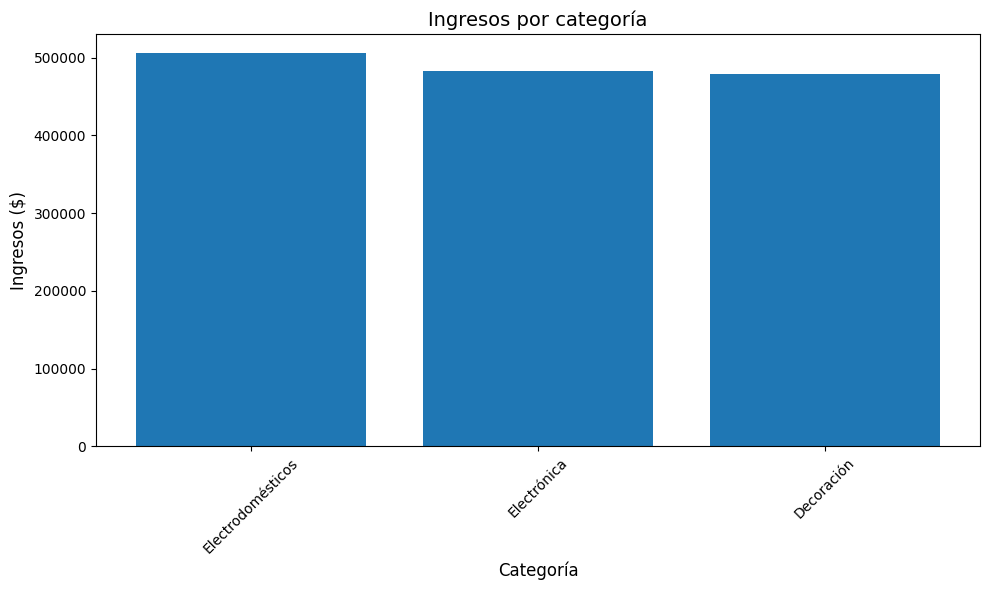

In [114]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.bar(top_categorias["categoria"], top_categorias["importe"])
plt.xticks(rotation=45)
plt.xlabel("Categoría")
plt.ylabel("Ingresos ($)")
plt.title("Ingresos por categoría")
plt.tight_layout()
plt.show()



## 4.2 Visualización avanzada con Seaborn
Se incorporan visualizaciones estadísticas (distribuciones y boxplots) para analizar dispersión y comportamiento de variables.

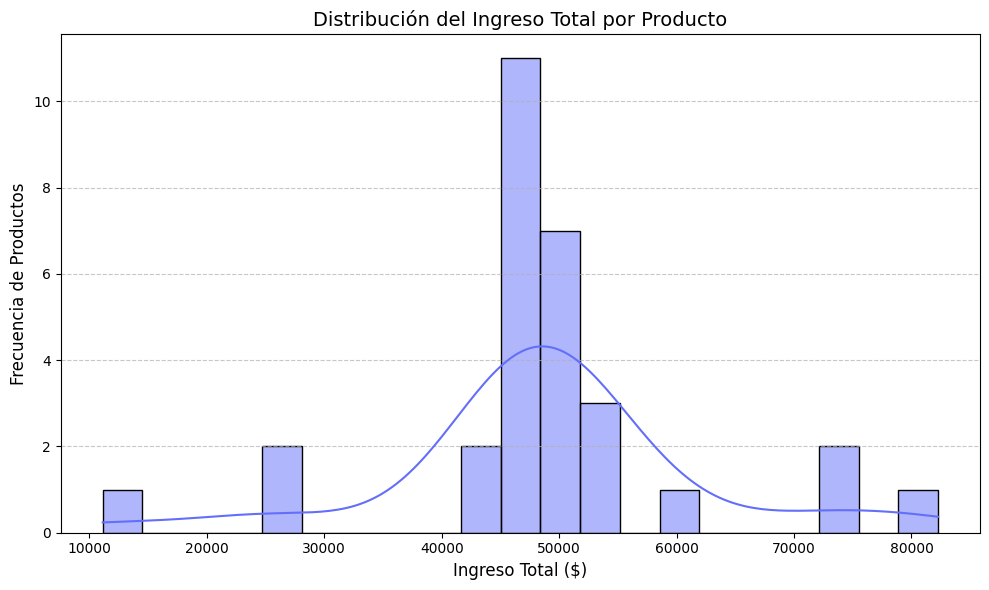

In [115]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(ingresos_por_producto['ingresos'], kde=True, color=color_principal)
plt.title('Distribución del Ingreso Total por Producto')
plt.xlabel('Ingreso Total ($)')
plt.ylabel('Frecuencia de Productos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

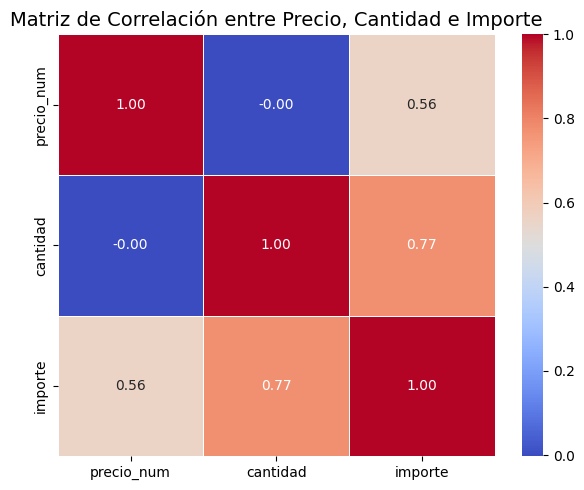

In [116]:
corr = ventas[["precio_num", "cantidad", "importe"]].corr()

# Usar un colormap divergente para correlación
plt.figure(figsize=(6, 5)) # Ajustar el tamaño de la figura para una mejor visualización
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5) # Usar 'coolwarm' como colormap divergente, añadir líneas entre celdas
plt.title("Matriz de Correlación entre Precio, Cantidad e Importe") # Título más descriptivo
plt.tight_layout()
plt.show()

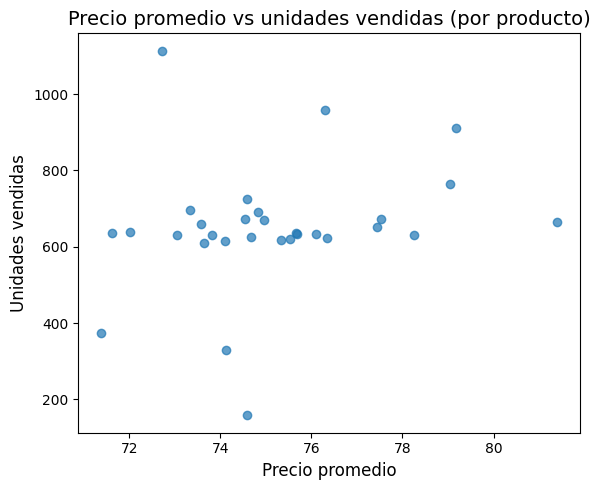

,precio_promedio,unidades
precio_promedio,1.000000,0.216834
unidades,0.216834,1.000000


In [117]:
# Resumen por producto
resumen_prod = (
    ventas.groupby("producto", as_index=False)
    .agg(
        precio_promedio=("precio_num", "mean"),
        unidades=("cantidad", "sum")
    )
)

# Gráfico de dispersión
plt.figure(figsize=(6,5))
plt.scatter(
    resumen_prod["precio_promedio"],
    resumen_prod["unidades"],
    alpha=0.7
)

plt.title("Precio promedio vs unidades vendidas (por producto)")
plt.xlabel("Precio promedio")
plt.ylabel("Unidades vendidas")
plt.tight_layout()
plt.show()

# Correlación numérica
resumen_prod[["precio_promedio", "unidades"]].corr()


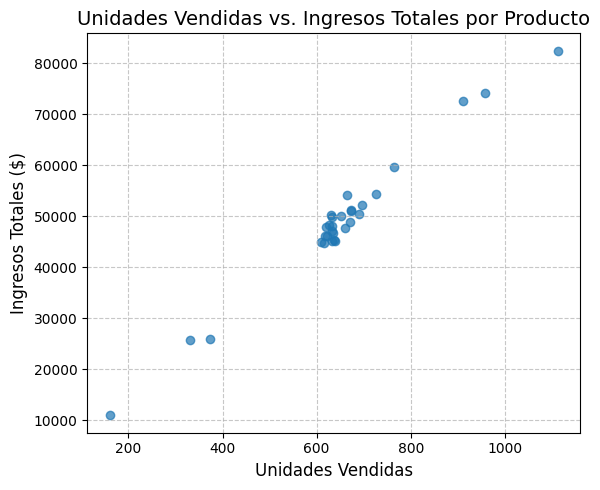

In [118]:
# Redefine resumen_prod locally to include 'ingresos' for this plot
resumen_prod = (
    ventas.groupby("producto", as_index=False)
    .agg(
        precio_promedio=("precio_num", "mean"),
        unidades=("cantidad", "sum"),
        ingresos=("importe", "sum")
    )
)

# Gráfico de dispersión
plt.figure(figsize=(6,5))
plt.scatter(
    resumen_prod["unidades"],
    resumen_prod["ingresos"],
    alpha=0.7,

)

plt.title("Unidades Vendidas vs. Ingresos Totales por Producto")
plt.xlabel("Unidades Vendidas")
plt.ylabel("Ingresos Totales ($)")
plt.grid(True, linestyle='--', alpha=0.7) # Añadir cuadrícula
plt.tight_layout()
plt.show()

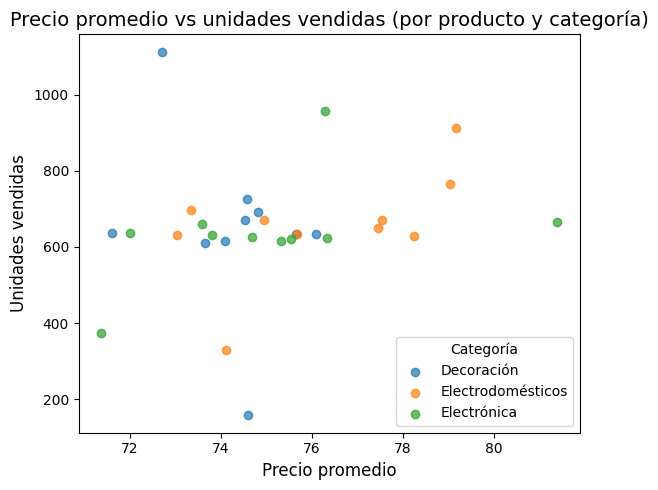

In [119]:
resumen_prod_cat = (
    ventas.groupby(["producto","categoria"], as_index=False)
    .agg(
        precio_promedio=("precio_num","mean"),
        unidades=("cantidad","sum")
    )
)

plt.figure(figsize=(6,5))

for cat in resumen_prod_cat["categoria"].unique():
    tmp = resumen_prod_cat[resumen_prod_cat["categoria"] == cat]
    plt.scatter(
        tmp["precio_promedio"],
        tmp["unidades"],
        label=cat,
        alpha=0.7
    )

plt.title("Precio promedio vs unidades vendidas (por producto y categoría)")
plt.xlabel("Precio promedio")
plt.ylabel("Unidades vendidas")
plt.legend(title="Categoría")
plt.tight_layout()
plt.show()


Además del análisis entre precio promedio y unidades vendidas, se exploraron otras relaciones relevantes a nivel de producto,
como la asociación entre precio e ingresos totales y la segmentación por categoría,
con el objetivo de identificar patrones estructurales en el desempeño comercial.


In [120]:
# Dataset final 1: por mes y categoría
final_mes_categoria = (ventas
    .groupby(["mes","categoria"], as_index=False)
    .agg(ingresos=("importe","sum"), unidades=("cantidad","sum"), n_ventas=("id_venta","count"))
    .sort_values(["mes","ingresos"], ascending=[True, False])
)

# Integración simple con marketing (por producto) para analizar por canal

marketing_canal = (
    marketing.groupby("canal", as_index=False)
    .agg(
        campañas=("id_campanha", "count"),
        costo_total=("costo", "sum"),
        costo_promedio=("costo", "mean")
    )
)


final_mes_categoria.head(), marketing_canal.head()


(       mes          categoria  ingresos  unidades  n_ventas
 0  2024-01         Decoración  47328.61     636.0        99
 2  2024-01        Electrónica  41771.78     556.0        91
 1  2024-01  Electrodomésticos  40504.60     549.0        80
 3  2024-02         Decoración  44907.81     607.0        91
 5  2024-02        Electrónica  38800.91     538.0        86,
    canal  campañas  costo_total  costo_promedio
 0  Email        30       145.20        4.840000
 1   RRSS        30       150.91        5.030333
 2     TV        30       147.47        4.915667)

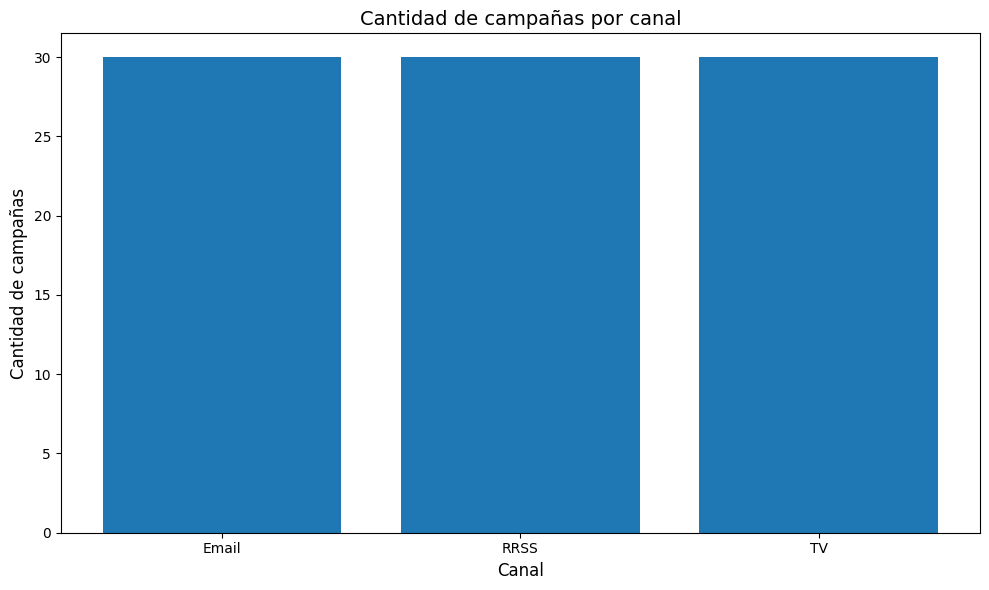

In [89]:
plt.figure(figsize=(10, 6))
plt.bar(marketing_canal["canal"], marketing_canal["campañas"])
plt.xlabel("Canal")
plt.ylabel("Cantidad de campañas")
plt.title("Cantidad de campañas por canal")
plt.tight_layout()
plt.show()


En marketing se observa una distribución **muy pareja** entre canales (misma cantidad de campañas por canal en este dataset) y diferencias **leves** en los costos totales/promedios. Esto sugiere una estrategia relativamente equilibrada de inversión, con variaciones menores que pueden depender del tipo de campaña o producto promocionado.



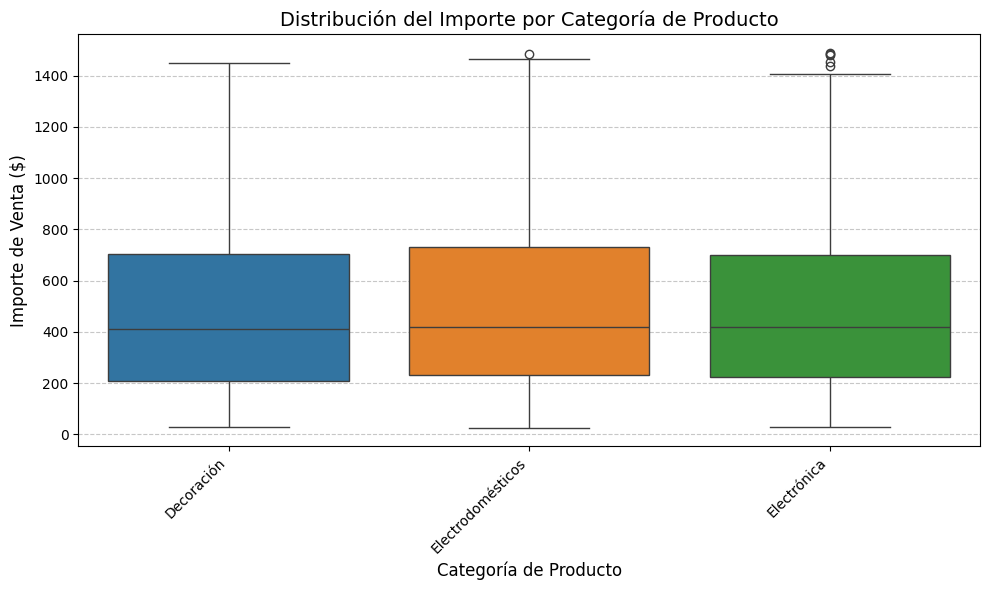

In [122]:
# Distribución de importe por categoría (boxplot)

plt.figure(figsize=(10, 6))
sns.boxplot(data=ventas, x="categoria", y="importe", hue="categoria", legend=False)
plt.xticks(rotation=45, ha='right')
plt.title("Distribución del Importe por Categoría de Producto")
plt.xlabel("Categoría de Producto")
plt.ylabel("Importe de Venta ($)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()




## 4.3 Visualización interactiva con Plotly
Se construyen visualizaciones interactivas para explorar los resultados de forma dinámica.


In [123]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# 1) Línea ingresos mensuales (usando color_principal)
fig1 = px.line(ventas_mensuales, x="mes", y="ingresos", markers=True,
             title="Ingresos Mensuales Totales",
             labels={"mes": "Mes", "ingresos": "Ingresos ($)"})
fig1.update_traces(marker=dict(color=color_principal, size=8), line=dict(color=color_principal, width=2))
fig1.update_layout(title_font_size=16, font_size=10)

# 2) Barras top 10 productos (usando color_principal)
fig2 = px.bar(top_productos, x="producto", y="importe",
             title="Top 10 Productos por Ingresos",
             labels={"producto": "Producto", "importe": "Ingresos ($)"},
             color_discrete_sequence=[color_principal]) # Usar el color principal
fig2.update_layout(xaxis_tickangle=-45, title_font_size=16, font_size=10)

# 3) Dispersión precio vs cantidad (coloreado por categoría, usando paleta_categorias)
fig3 = px.scatter(ventas, x="precio_num", y="cantidad",
                  hover_data=["producto","categoria"],
                  title="Precio Unitario vs. Cantidad Vendida por Venta",
                  labels={"precio_num": "Precio Unitario ($)", "cantidad": "Cantidad Vendida"},
                  color="categoria", # Colorear por categoría
                  color_discrete_sequence=paleta_categorias) # Usar la paleta categórica
fig3.update_layout(title_font_size=16, font_size=10)


fig1.show()
fig2.show()
fig3.show()

## 4.4 Presentación final: hallazgos e insights

**Resumen del análisis**
- Se limpiaron y tiparon correctamente los datos (precios, cantidades y fechas), eliminando duplicados en ventas.
- Se realizaron análisis descriptivos y exploratorios para caracterizar el comportamiento de ventas.
- Se evaluaron relaciones entre variables (precio, cantidad e importe) y se profundizó la correlación a nivel producto.
- Se consolidaron resultados en tablas resumen para facilitar la presentación.

**Hallazgos clave**
- Los ingresos mensuales muestran variaciones a lo largo del año, con picos y caídas que pueden analizarse en la serie temporal.
- A nivel categoría, los ingresos se distribuyen de manera relativamente equilibrada, con diferencias moderadas entre segmentos.
- La relación entre cantidad vendida e ingresos totales por producto es positiva, como era esperable, mientras que la relación entre precio promedio y unidades vendidas es más débil y puede variar por categoría.
- En marketing, la cantidad de campañas por canal es pareja en este dataset y los costos presentan diferencias leves.

**Datasets finales generados para la presentación**
- `ventas_mensuales`: resumen mensual (ingresos, unidades y número de ventas)
- `final_mes_categoria`: ingresos, unidades y ventas por mes y categoría
- `top_productos` / `top_categorias`: rankings por aporte a ingresos
- `marketing_canal`: campañas y costos por canal



# Anexo

## - Incluir al final un bloque de texto llamado “Anexo” con descripción y links a todos los archivos adicionales que haya incluido en la carpeta.

Link a Repositorio Github

https://github.com/Guiye79/Piazza-Guillermo-Jorge_Comision-25262_TPI-Data-Analytics-Final/blob/main/TPI_Data_Analytics_FINAL.ipynb


Link a Google_Drive con archivos.csv


https://drive.google.com/drive/folders/1WOTqJ-0wx4F235WkYgGphm29tG2xm-mM


Link a Resultados_preentrega con archivos.csv


https://drive.google.com/drive/folders/1FSRTFoI-IKA0RrUvAqAIQKf3_YkMepec